In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data_c = pd.read_csv("csv/all_cold.csv", parse_dates=["Date"])

data_c = pd.read_csv("csv/all_cold.csv", parse_dates=["Date"])
avg_value = data_c['Consumption'].mean()
avg_value
data_c = data_c.set_index('Date')
data_c

,Consumption,Holiday
Date,,
2022-10-01,0.20,0
2022-10-10,0.28,0
2022-10-11,0.25,0
2022-10-12,0.22,0
2022-10-13,0.21,0
...,...,...
2023-01-05,0.52,0
2023-01-06,0.29,0
2023-01-07,0.17,0


In [3]:
data_h = pd.read_csv("csv/all_hot.csv", parse_dates=["Date"])
data_h = data_h.set_index('Date')
data_h

,Consumption,Holiday
Date,,
2022-10-01,0.16,0
2022-10-10,0.24,0
2022-10-11,0.16,0
2022-10-12,0.18,0
2022-10-13,0.11,0
...,...,...
2023-01-05,0.41,0
2023-01-06,0.09,0
2023-01-07,0.20,0


In [4]:
def create_features(data):
    """
    Create time series features based on time series index.
    """
    data = data.copy()
    data['dayofweek'] = data.index.dayofweek
    data['month'] = data.index.month
    return data

data_c = create_features(data_c)
data_h = create_features(data_h)

In [5]:
data_c.keys()

Index(['Consumption', 'Holiday', 'dayofweek', 'month'], dtype='object')

In [6]:
data_h.keys()

Index(['Consumption', 'Holiday', 'dayofweek', 'month'], dtype='object')

In [7]:
features = ['month', 'Holiday','dayofweek']

In [8]:
X_c = data_c[features]
y_c = data_c['Consumption']

In [9]:
X_h = data_h[features]
y_h = data_h['Consumption']

In [10]:
from sklearn.tree import DecisionTreeRegressor


tree_c = DecisionTreeRegressor(random_state=1)
tree_c.fit(X_c, y_c)

DecisionTreeRegressor(random_state=1)

In [11]:
tree_h = DecisionTreeRegressor(random_state=1)
tree_h.fit(X_h, y_h)

DecisionTreeRegressor(random_state=1)

In [12]:
data_c

,Consumption,Holiday,dayofweek,month
Date,,,,
2022-10-01,0.20,0,5,10
2022-10-10,0.28,0,0,10
2022-10-11,0.25,0,1,10
2022-10-12,0.22,0,2,10
2022-10-13,0.21,0,3,10
...,...,...,...,...
2023-01-05,0.52,0,3,1
2023-01-06,0.29,0,4,1
2023-01-07,0.17,0,5,1


In [13]:
data_h

,Consumption,Holiday,dayofweek,month
Date,,,,
2022-10-01,0.16,0,5,10
2022-10-10,0.24,0,0,10
2022-10-11,0.16,0,1,10
2022-10-12,0.18,0,2,10
2022-10-13,0.11,0,3,10
...,...,...,...,...
2023-01-05,0.41,0,3,1
2023-01-06,0.09,0,4,1
2023-01-07,0.20,0,5,1


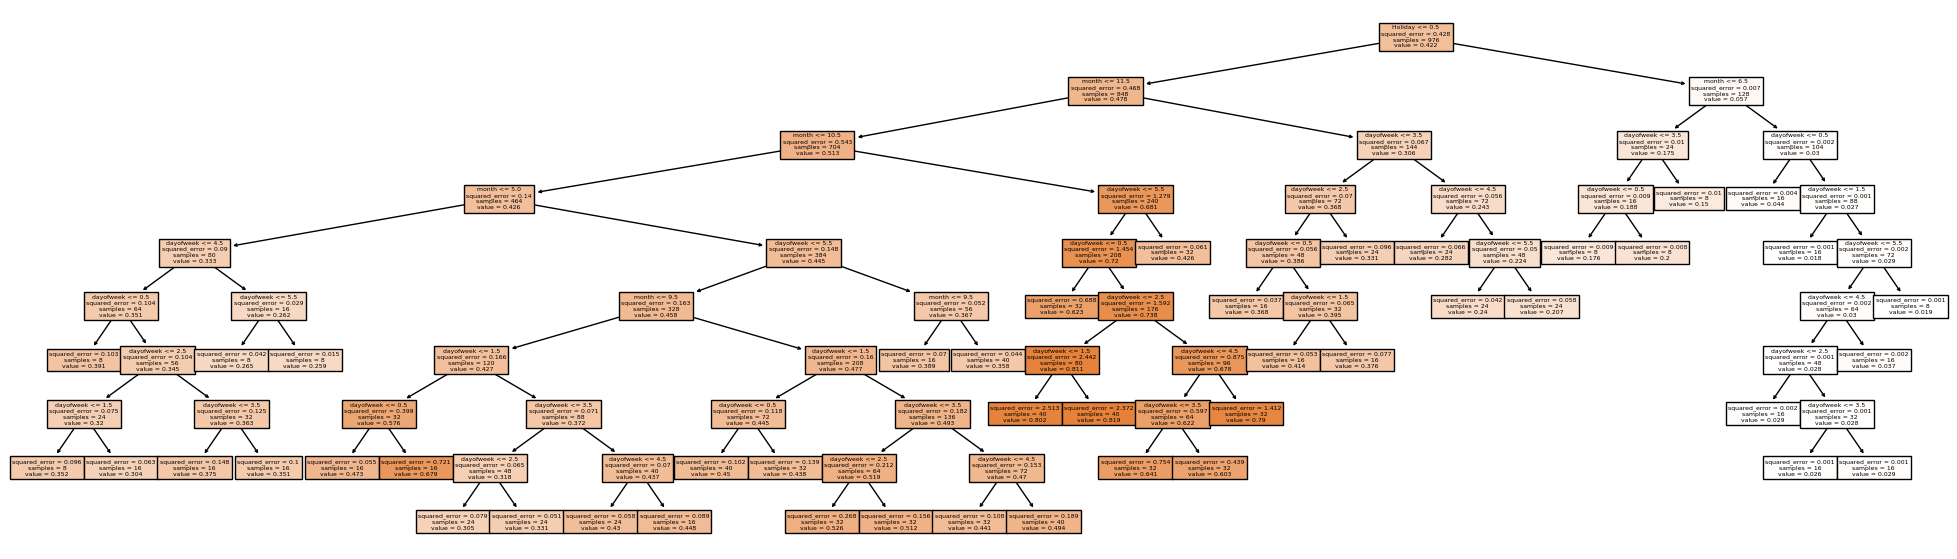

In [14]:
from sklearn.tree import plot_tree


plt.figure(figsize=(25, 7))
plot_tree(tree_c, feature_names=features, filled=True);

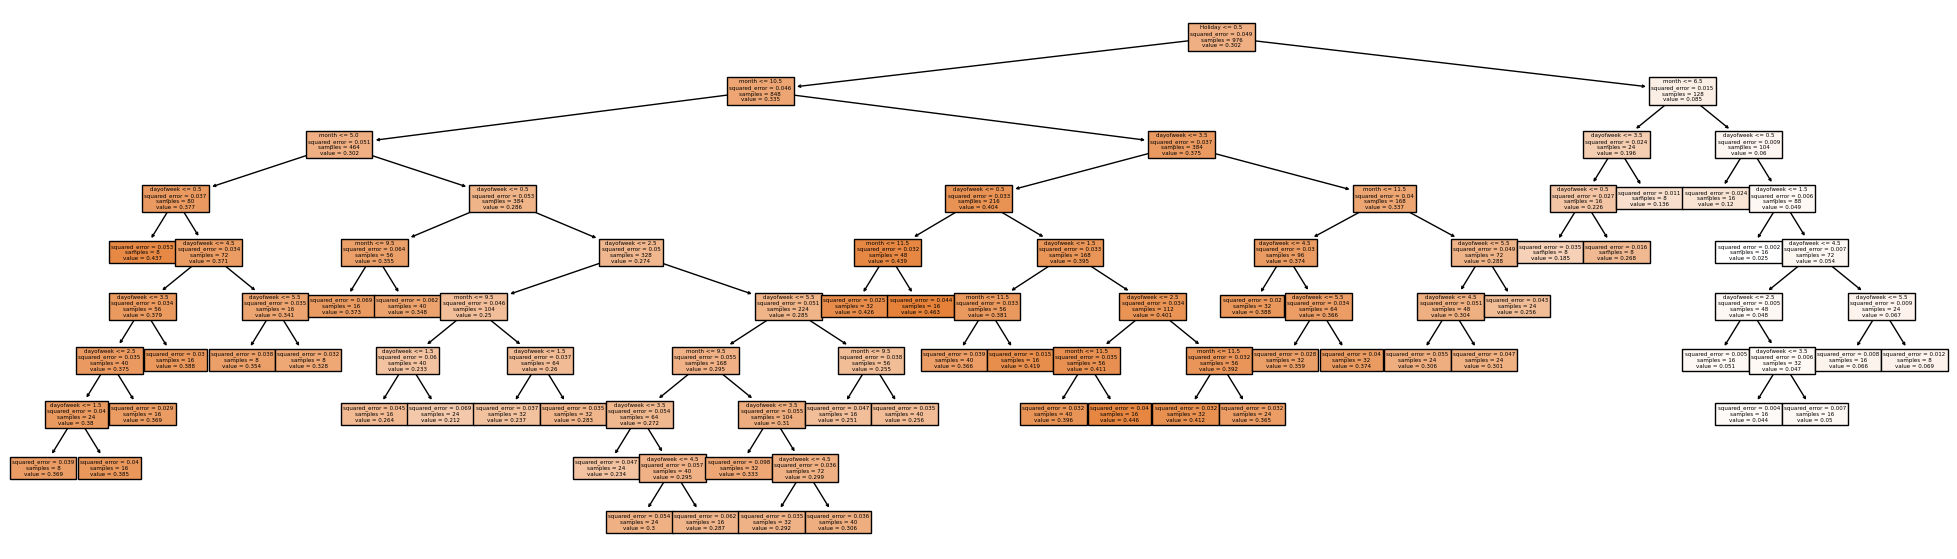

In [15]:
plt.figure(figsize=(25, 7))
plot_tree(tree_h, feature_names=features, filled=True);

In [17]:
print('prediction of cold water :' ,tree_c.predict([[12, 0, 0]]))

prediction of cold water : [0.3675]


c:\Users\NAZIYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [18]:
print('prediction of hot water :' ,tree_h.predict([[1, 0, 0]]))

prediction of hot water : [0.4375]


c:\Users\NAZIYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

filename = 'water_cold.pickle'
with open(filename, 'wb') as file:
    pickle.dump(tree_c, file)

filename1 = 'water_hot.pickle'
with open(filename1, 'wb') as file1:
    pickle.dump(tree_h, file1)



In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.33, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_h, y_h, test_size=0.33, random_state=42)

In [20]:
tesTree = DecisionTreeRegressor(random_state=1)
tesTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [21]:
tesTree1 = DecisionTreeRegressor(random_state=1)
tesTree1.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=1)

In [22]:
import math
math.sqrt(mse(y_test1, tesTree1.predict(X_test1)))

0.191307359253576

In [29]:
row_mean = data_c.loc['Consumption'].mean()

KeyError: 'Consumption'

In [23]:
y_test1[0:10]

Date
2022-12-24    0.28
2022-11-03    0.43
2022-11-29    0.24
2022-09-24    0.38
2022-12-14    0.00
2022-10-14    0.00
2022-10-09    0.17
2023-01-11    0.68
2022-11-12    0.14
2022-11-14    0.52
Name: Consumption, dtype: float64

In [24]:
tesTree1.predict(X_test1)[0:10]

array([0.33055556, 0.37913043, 0.38482759, 0.24555556, 0.025     ,
       0.305     , 0.2762963 , 0.34888889, 0.36083333, 0.41807692])

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
tesTree2 = DecisionTreeRegressor(random_state=1)
tesTree2.fit(X_train_std, y_train)

DecisionTreeRegressor(random_state=1)

In [27]:
import math
math.sqrt(mse(y_test, tesTree2.predict(X_test_std)))

0.5821710001582966

In [28]:
math.sqrt(mse(y_test, tesTree.predict(X_test_std)))

C:\Users\NAZIYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.584666879156353